**`format` 지정 메뉴얼 https://www.ibm.com/docs/ko/cmofm/10.5.0?topic=reference-date-time-formats**

# Time Series

## **1. ts object**

`-` `ts()`

In [2]:
x <- 1:10
class(x)
mode(x)

[1] "integer"

[1] "numeric"

> 일반적인 행렬

In [3]:
## Generating time series
x <- ts(1:10)
class(x)

[1] "ts"

`-` 기본적인 시계열 자료 생성 방법

In [21]:
## 2000년 1월부터 12개월 주기의 time series 생성
x <- ts(rnorm(50), start = c(2000, 1), frequency = 12) ## 12, 4 is special numbers

In [22]:
x ## 시간 순서대로 time series가 생성된다.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,0.773684733,-1.047840258,2.466004981,-0.198858948,0.659172266,0.256768688,-1.457392377,-0.221316671,0.273617117,0.839917304,-2.189548108,-0.181727207
2001,0.364037687,1.428738007,-1.125036901,0.204890940,-0.954041948,-0.185891130,-1.422435152,-1.955849439,0.707006558,-1.715997330,0.600619478,1.315037557
2002,-0.284911406,-0.549404026,1.835273985,-0.604325787,0.058916833,-1.255923926,0.630636091,-1.017343898,1.239051269,-1.056867235,-1.192079560,2.049601571
2003,1.326300322,0.244629656,-0.021962057,0.003034892,-0.404886112,-0.446353615,-0.838653142,0.931456935,0.221356139,-0.755772110,-1.141588819,-0.411896759
2004,-1.839492653,-0.143615283,,,,,,,,,,


`-` 시계열 자료의 사이클(주기) 파악 및 수치화

In [12]:
cycle(x)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12
2004,1,2,,,,,,,,,,


> 사이클을 뽑아주는 함수로 사용할 수도 있다.

**근데, ARIMA와 같은 모형을 사용하려고 할 때, 굳이 ts 객체로 만들어서 할 필요는 없다.**

In [24]:
## 시간을 뽑아주는 함수도 있다.
time(x)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2000.000,2000.083,2000.167,2000.250,2000.333,2000.417,2000.500,2000.583,2000.667,2000.750,2000.833,2000.917
2001,2001.000,2001.083,2001.167,2001.250,2001.333,2001.417,2001.500,2001.583,2001.667,2001.750,2001.833,2001.917
2002,2002.000,2002.083,2002.167,2002.250,2002.333,2002.417,2002.500,2002.583,2002.667,2002.750,2002.833,2002.917
2003,2003.000,2003.083,2003.167,2003.250,2003.333,2003.417,2003.500,2003.583,2003.667,2003.750,2003.833,2003.917
2004,2004.000,2004.083,,,,,,,,,,


## **2. Graph**

In [25]:
x <- rnorm(100)
class(x)

[1] "numeric"

In [26]:
t <- 1:100

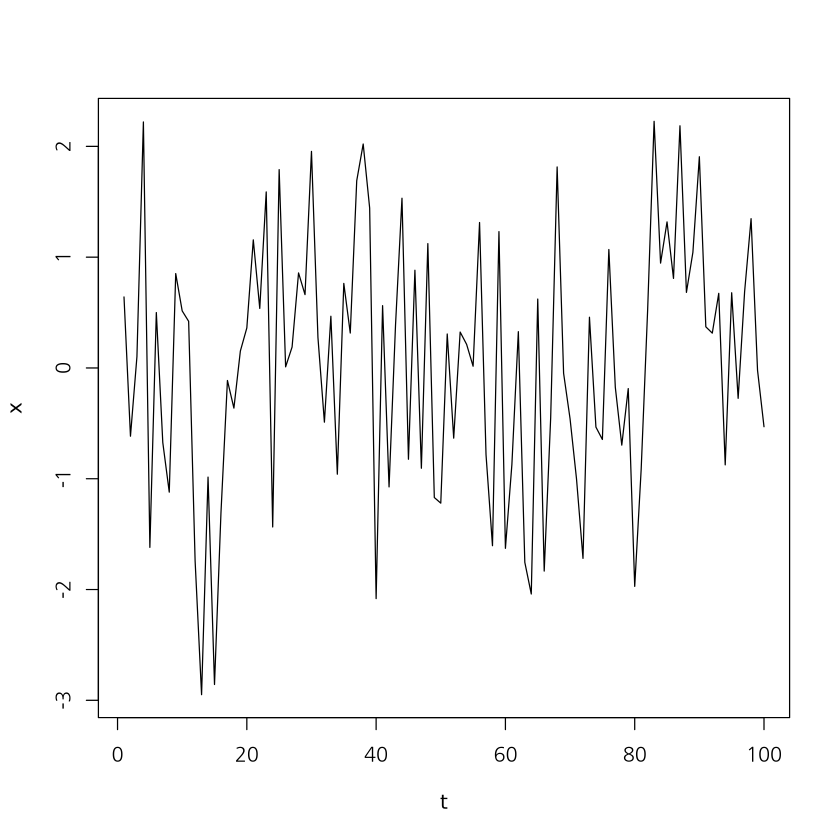

In [30]:
plot(t, x, type = "l")

> 시계열 그래프는 선으로 표시해야 함.

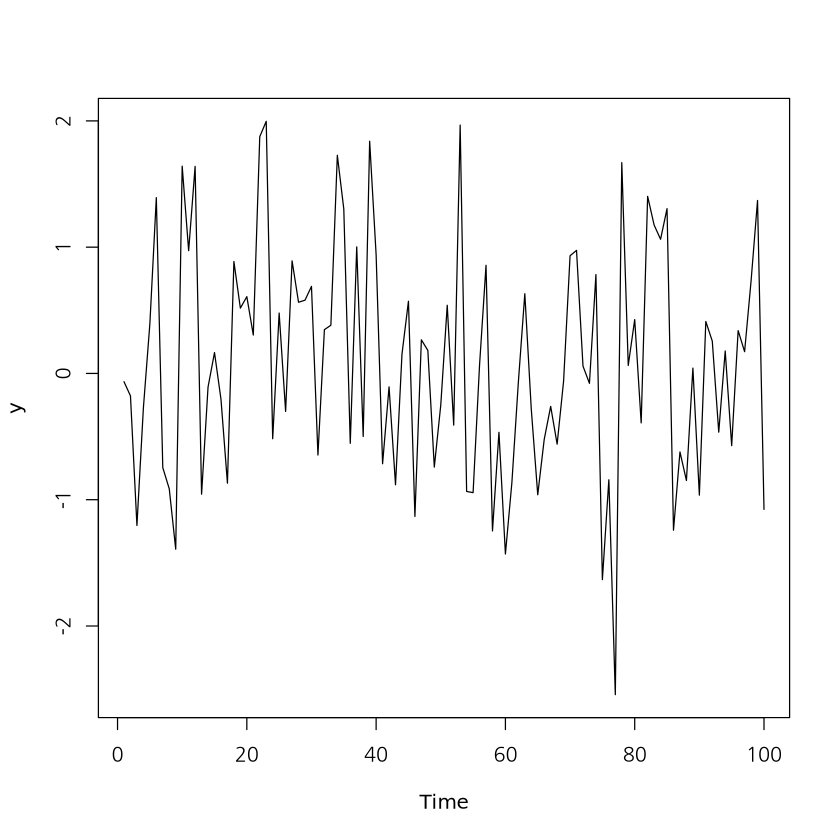

In [34]:
y <- ts(rnorm(100))
plot(y)

> ts 객체를 먹이면 바로 선으로 바꿔준다.

`-` 또는 함수를 이용하여 파라미터를 생략할 수도 있다.

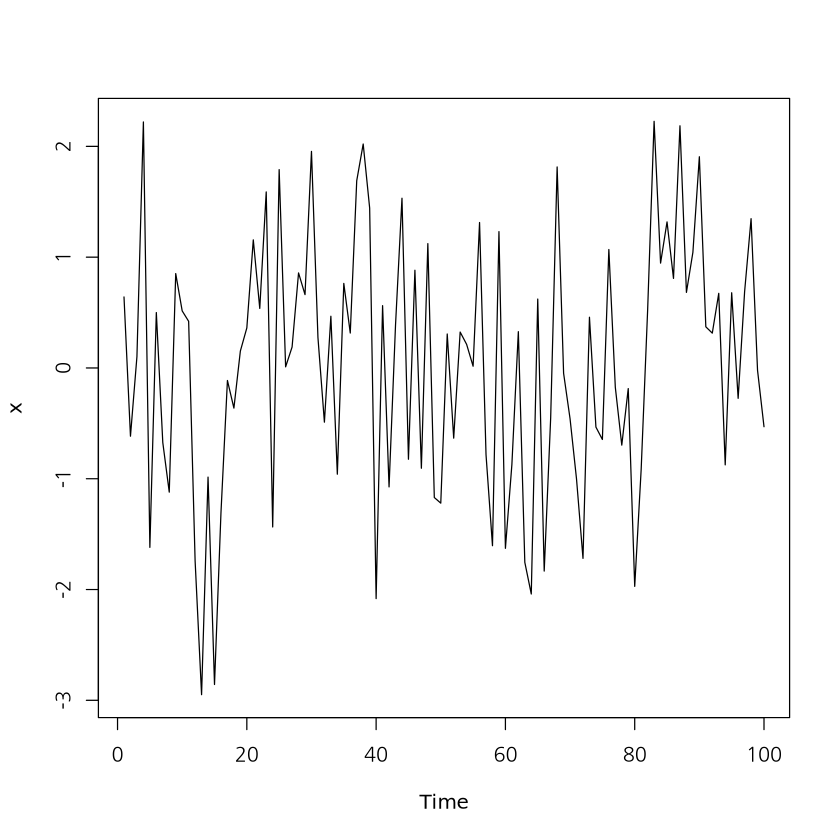

In [35]:
plot.ts(x)

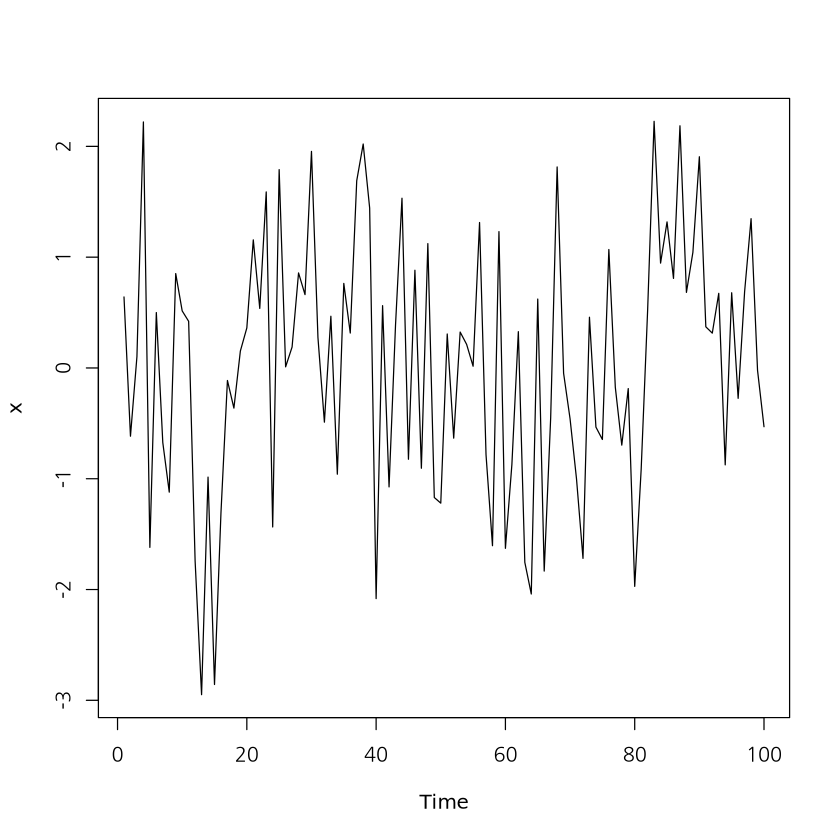

In [37]:
ts.plot(x)

**Time Series가 하나만 있는 것은 아님;;**

## **3. 다차원의 Time Series**

In [38]:
z <- ts(matrix(rnorm(300), 100, 3), start = c(2000), frequency = 12)

In [42]:
head(z)

Series 1,Series 2,Series 3
-0.69681384,-0.9870752,-0.2269498
-0.48020670,-1.7425618,0.4567902
-0.43150401,-0.5863205,0.4082682
0.06771664,-0.8328560,-0.2182580
1.52158783,0.2641130,-1.6745798
0.66993775,0.1500739,-0.9600464


> 3개의 Time Series가 생성된 것을 알 수 있음.

`-` 여러 time series의 plotting

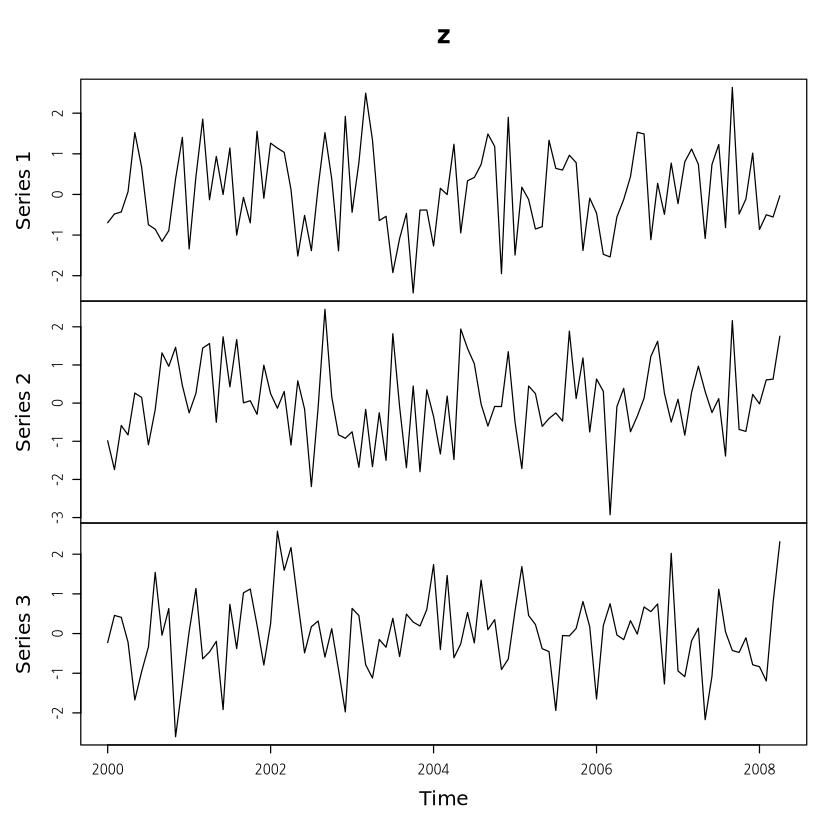

In [43]:
plot(z)

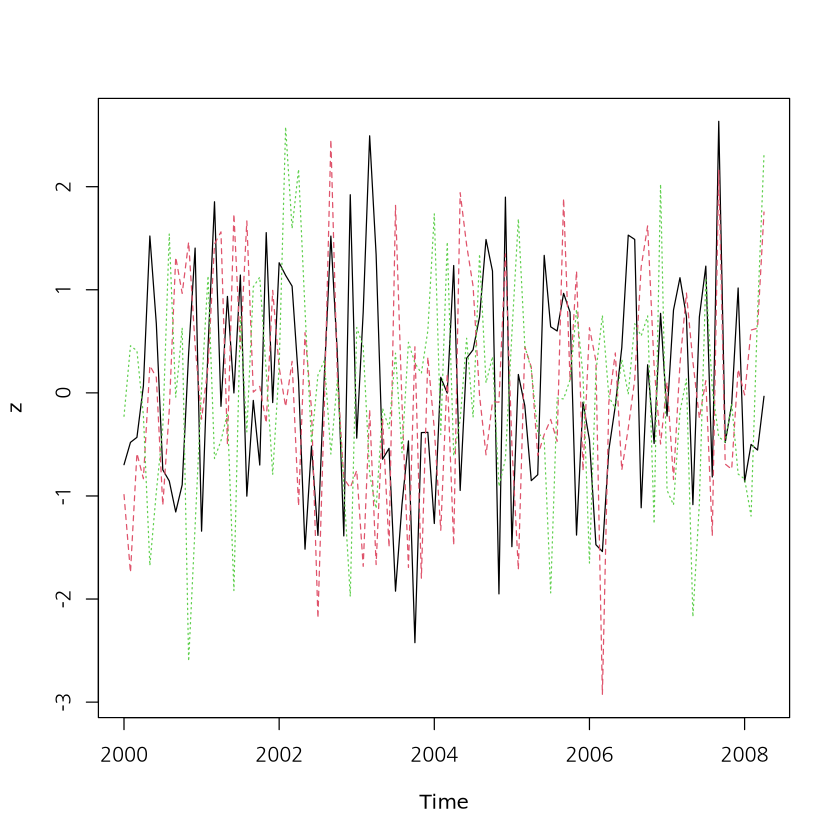

In [49]:
## 세 개의 그래프를 하나에 그려줌
plot.ts(z, plot.type = "single", col = 1:3, lty = 1:3)
#ts.plot(z, col = 1:3, lty = 1:3)

## **4. 실습 예제 : Iris data**

In [50]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [51]:
t_iris = as.ts(iris[, -5]) ## 5열 제외

In [53]:
class(t_iris)

[1] "mts"    "ts"     "matrix" "array"

> `mattrix` 이면서 `timeseries, array.`

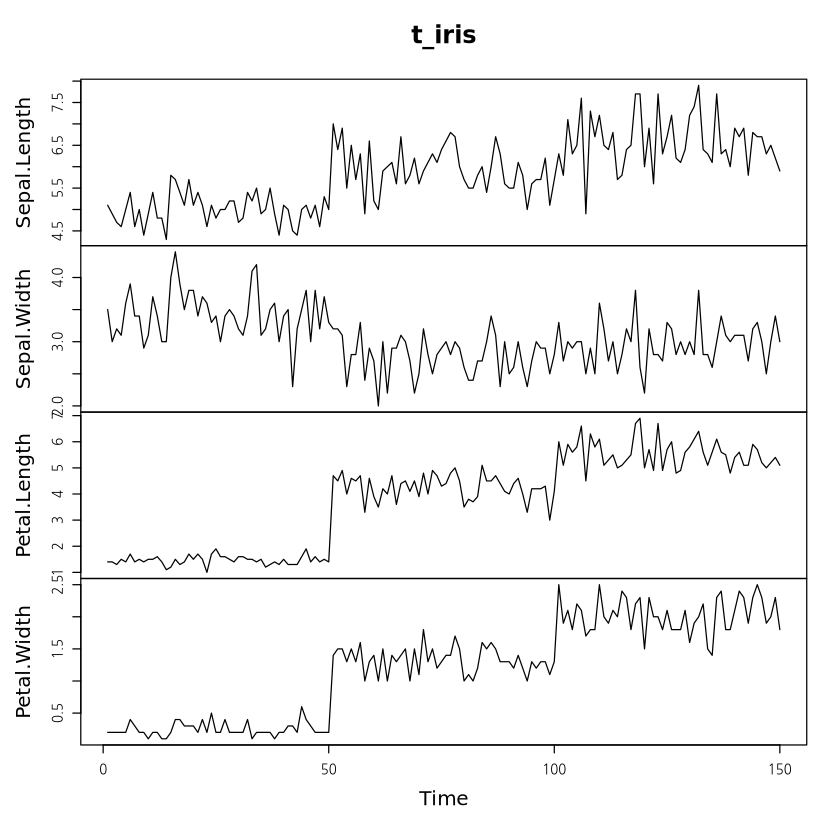

In [54]:
plot.ts(t_iris)

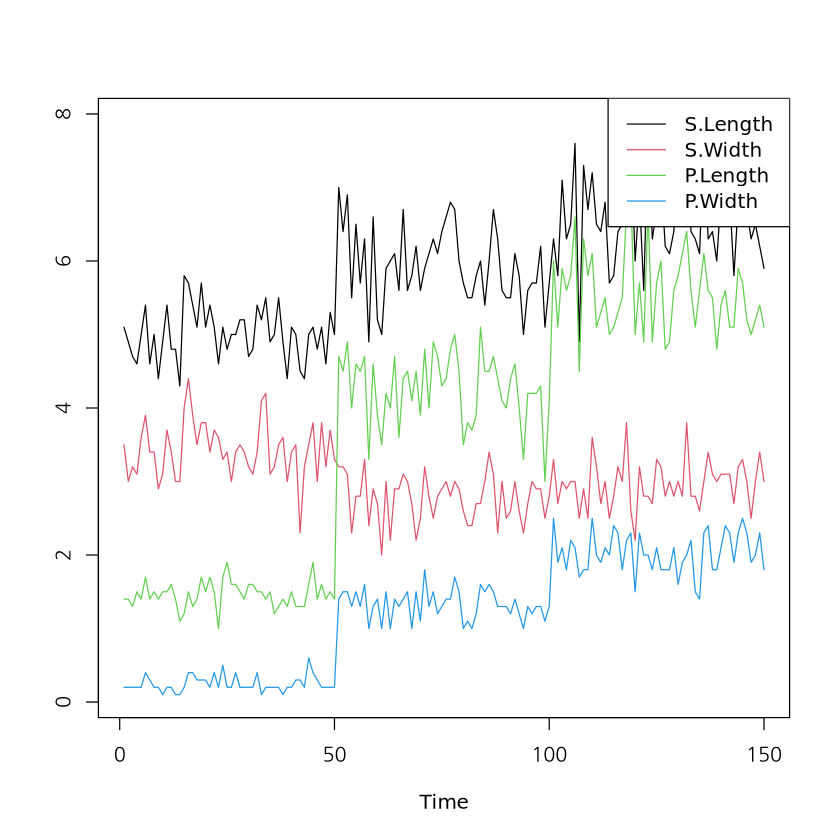

In [65]:
ts.plot(t_iris, col = 1:4)
legend('topright', c('S.Length', 'S.Width', 'P.Length', 'P.Width'), col = 1:4, lty = 1)

## **5. Date**

$$\text{수익률? : } r_{t, 3M} = \frac{y_{t+3M}}{y_t} - 1$$

`-` `Sys.Date` object

In [67]:
Sys.Date() ## 시스템 날짜

[1] "2024-10-01"

In [68]:
date() ## 시스템 시간

[1] "Tue Oct  1 10:27:16 2024"

In [69]:
a = Sys.Date()

In [70]:
class(a)

[1] "Date"

In [71]:
a <- "2023-09-12"  ## character
class(a)

[1] "character"

> 시계열이여도 기본적으로 문서에서는 문자열 자료로 입력되있는 경우가 많음. 따라서 바꿔줄 필요가 있음.

In [72]:
a_date = as.Date(a)
class(a_date)
a_date

[1] "Date"

[1] "2023-09-12"

`-` Date type 연산

In [73]:
a = as.Date(c("2023-09-12", "2024-01-01"))
a

[1] "2023-09-12" "2024-01-01"

In [77]:
a[2] - a[1]
class(a[2] - a[1]) ## Date type 간 연산 -> difftime

Time difference of 111 days

[1] "difftime"

In [79]:
a[1] + 1 ## 정수와의 연산 -> Date

[1] "2023-09-13"

In [84]:
a[1] + 0.5 ## 실수와의 연산 -> Date

[1] "2023-09-12"

`-` 약속된 문자열로 표기되지 않은 경우

> 함수를 만들어 사용하거나 패키지를 이용할 수 있다.

In [90]:
format(a[1], format="%Y/%B") ## B : 사용 문자 기준 텍스트 날짜

[1] "2023/9월"

In [96]:
format(a[1], format="%d-%m-%y") ## y : 뒤 년도만 표기

[1] "12-09-23"

In [106]:
weekdays(as.Date("01/10/24")) ## 연, 월, 일 순서대로만 읽음... 정확하게 인식시켜줄 필요가 있음

[1] "수요일"

In [110]:
b = as.Date("01/10/24", format="%d/%m/%y")
weekdays(b) ## 제대로 알려줌

[1] "화요일"

**`format` 지정 메뉴얼 https://www.ibm.com/docs/ko/cmofm/10.5.0?topic=reference-date-time-formats**

## **6. `lubridate` 패키지를 이용한 Date type handling**

In [1]:
## install.packages("lubridate")
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### A. 날짜, 시간 정보를 추출 : `today()`, `now()`

In [114]:
a = today() ## Sys.Date()와 동일
a

[1] "2024-10-01"

In [128]:
## 바로 뽑아낼 수 있음
year(a)
month(a)
day(a)
wday(a) ## 일요일부터 1인듯

[1] 2024

[1] 10

[1] 1

[1] 3

In [130]:
wday(a, label = TRUE) ## 실제 요일로 보여달라고 하면, ordered factor object가 된다.

[1] 화
Levels: 일 < 월 < 화 < 수 < 목 < 금 < 토

In [136]:
now() ## date()랑은 좀 다름
class(now()) ## 표준시간

[1] "2024-10-01 10:53:40 KST"

[1] "POSIXct" "POSIXt"

In [137]:
hour(now())
minute(now())
second(now())

[1] 10

[1] 55

[1] 18.50229

### B. 문자열의 Date type converting

In [19]:
ymd("2024-10-01")
myd("09-23-12")
dym("30-24-09")
ym(202410)
hms("11:30:00")
hm("11:30")

[1] "2024-10-01"

[1] "2023-09-12"

[1] "2024-09-30"

[1] "2024-10-01"

[1] "11H 30M 0S"

[1] "11H 30M 0S"

In [5]:
ymd("2023 9월 12")
ymd("2023 Sep 12", locale = "en_US") ## Need to generating locale in OS

[1] "2023-09-12"

[1] "2023-09-12"

In [7]:
ymd_hms("2024-10-01 12:43:12") ## 기본은 세계표준시
ymd_hms("2024-10-01 12:43:12", tz="Asia/Seoul") ## YYYY-MM-DD HH:MM:SS Region

[1] "2024-10-01 12:43:12 UTC"

[1] "2024-10-01 12:43:12 KST"

In [9]:
a = ymd_hms("2024-10-01 12:43:12", tz="Asia/Seoul")
with_tz(a, tz="America/New_York") ## 다른 지역에서 일어난 사건의 시간을 비교할 때 용이함

[1] "2024-09-30 23:43:12 EDT"

In [14]:
#?Sys.timezone

time zone 텍스트는 링크를 참조 https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

시차가 나는 지역의 데이터를 다룰 때, 상당한 유의가 필요하다.

9/12 9시 ------ 9/12 20시

9/12 9시(한국) ------ 9/12 9시(미국) : 미국의 정보를 설명변수로 사용한다고 하면, 미래의 정보를 예측에 포함시키는 것이므로... 시계열 분석에서 상당한 문제가 있음.

### C. 시간의 업데이트

`-` 필요한 시점을 임의로 바꾸고 싶을 때

In [24]:
update(now(), years=1901, hours=10, minutes=10) ## 시간과 분을 직접 정해주는 함수

[1] "1901-10-01 10:10:21 LMT"